In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data= pd.read_csv("/content/datafinal.csv", sep="|", encoding="utf-8")

In [ ]:
data.head(10)

Title  \
0  Wipro launches Wipro Shelde Australia to bolst...   
1                     Are Banned Apps Really Banned?   
2  Governor of Jharkhand launches Ranchi Universi...   
3   US congressmen to visit Taipei from August 14-15   
4  Security firm finds flaws in Indian online ins...   
5  Govt shares data on online banking fraud and h...   
6  Cyber Threats at Organization Level, Data Prot...   
7  An officer par excellence: Kerala strongest co...   
8  Why is Cyber Insurance a must-have in today's ...   
9  How to invest in an effective digital security...   

                                           News Link       Published Date  \
0  https://www.livemint.com/companies/news/wipro-...  08/11/2022 09:37:45   
1  https://analyticsindiamag.com/are-banned-apps-...  08/15/2022 04:30:00   
2  https://theprint.in/ani-press-releases/governo...  08/13/2022 11:52:13   
3  http://www.uniindia.com/us-congressmen-to-visi...  08/14/2022 23:05:57   
4  https://www.newindianexpress.com/business/2022...  08/10/2022 17:09:00   
5  https://www.livemint.com/news/india/govt-share...  08/09/2022 07:20:30   
6  https://www.news18.com/news/tech/cyber-threats...  08/09/2022 13:41:50   
7  https://www.oneindia.com/india/an-officer-par-...  08/15/2022 11:31:42   
8  https://www.expresscomputer.in/news/why-is-cyb...  08/10/2022 11:03:21   
9  https://infotechlead.com/security/how-to-inves...  08/10/2022 04:45:07   

                                                Text                 Authors  \
0        Wipro Limited, leading technology servic...                Livemint   
1  Security threats on the internet have always b...          Bhuvana Kamath   
2  Ranchi (Jharkhand) [India] August 13 (ANI/News...                  ANI PR   
3  US congressmen to visit Taipei from August 14-...   Uniindia News Service   
4  NEW DELHI: Last month, a small cybersecurity f...        Associated Press   
5  Cases related to online frauds have come down ...                Livemint   
6  In a world where everything is on the Internet...  Bhaswati Guha Majumder   
7  New Delhi, Aug 15: The strongest IPS officer i...  OneIndia Correspondent   
8  Why is Cyber Insurance a must-have in today’s ...        Express Computer   
9  With cyber threats continuing to grow both in ...                infotech   

                                           Thumbnail  \
0  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
1  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
2  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
3                                                NaN   
4  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
5  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
6  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
7  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
8  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
9  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   

                     Source  \
0                      Mint   
1  Analytics India Magazine   
2                  ThePrint   
3      UNITED NEWS OF INDIA   
4    The New Indian Express   
5                      Mint   
6                    News18   
7                  Oneindia   
8          Express Computer   
9              InfotechLead   

                                            Keywords Summary  \
0  ['Wipro Shelde Australia', 'specialist Austral...     NaN   
1  ['India', 'apps', 'banned apps working', 'bann...     NaN   
2  ['Ranchi University', 'Major Vineet Kumar', 'R...     NaN   
3  ['August 14-15 Washington', 'Senate Environmen...     NaN   
4  ['Policybazaar', 'data', 'Policybazaar custome...     NaN   
5  ['Cyber Security Framework', 'Rajya Sabha', 'C...     NaN   
6  ['data', 'HPE India CTO', 'data protection', '...     NaN   
7  ['President Police Medal', 'strongest IPS offi...     NaN   
8  ['Cyber Insurance', 'Insurance', 'Cyber', 'dat...     NaN   
9  ['security', 'cyber security', 'cyber', 'busin...     NaN   

   Sentiment Analysis  Sentiment Scor

In [ ]:
data["Text"][0]

'      Wipro Limited, leading technology services and consulting company, announced the launch of Wipro Shelde Australia, a sovereign cybersecurity offering for the Australian government and critical infrastructure industries, to help navigate the cyber threat landscape.    Wipro acquired Ampion in 2021 and in integrating its two businesses – Shelde and Revolution IT – into Wipro, it gained access to specialist Australian cybersecurity, DevOps and engineering capabilities.\xa0    The specialist Australian cybersecurity services provided by Shelde will now be promoted under the new offering.    This offering will provide clients access to local next-generation cybersecurity services through a pool of national security cleared consultants, experienced with the PGPA Act, Privacy Act, Protective Security Policy Framework, Essential 8, The Information Security Manual, and Commonwealth Risk Management Policy.    It will bolster Wipro’s comprehensive global cybersecurity and risk services to 

In [ ]:
data.shape

(3322, 13)

In [ ]:
data["Search Query"].value_counts()

ransomeware              191
phishing                 151
Cybersecurity policy     117
DDoS                     113
Civil unrest              90
Groundwater pollution     90
Severe cold weather       89
Trade agreement           89
Crime                     89
Border incident           89
Election                  89
Volcanic eruptions        88
Corruption                88
Earthquake                87
Storms                    87
War                       87
Drought                   87
Tsunami                   86
Diplomacy                 86
Terrorism                 86
Military exercise         86
Landslides                85
Wildfires                 85
Social trouble            85
Kidnapping                84
Workplace disaster        84
Floods                    84
Heatwave                  84
Water & food security     84
Civil war                 83
Health & Epidemic         82
Strike action             80
Migration                 79
Economic trends           76
Piracy        

In [ ]:
data["Search Query"].value_counts().count()

38

In [ ]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = data["Search Query"].unique()
print(target_category)

['Cybersecurity policy' 'Data breach' 'DDoS' 'phishing' 'ransomeware'
 'Avalanche' 'Drought' 'Earthquake' 'Floods' 'Groundwater pollution'
 'Heatwave' 'Landslides' 'Severe cold weather' 'Storms' 'Tsunami'
 'Volcanic eruptions' 'Wildfires' 'Corruption' 'Diplomacy' 'Election'
 'Social trouble' 'Health & Epidemic' 'Migration' 'Water & food security'
 'Workplace disaster' 'Border incident' 'Civil unrest' 'Civil war' 'Crime'
 'Kidnapping' 'Military exercise' 'Piracy' 'War' 'Terrorism'
 'vulnerability' 'Strike action' 'Trade agreement' 'Economic trends']


In [ ]:
data['CategoryId'] = data["Search Query"].factorize()[0]
data.head()
data.tail()

Title  \
3317  Klaipeda looks to position itself as the Blue ...   
3318  GBP/CA$ Outlook: Pound Canadian Dollar Rate Tr...   
3319  IN BRIEF: Thalassa turns to interim profit but...   
3320  Collapse in Empire State Index: &quot;Startlin...   
3321  Just when you thought things couldn’t get wors...   

                                              News Link       Published Date  \
3317  https://allaboutshipping.co.uk/2022/08/15/klai...  08/15/2022 07:36:14   
3318  https://www.exchangerates.org.uk/news/36283/20...  08/09/2022 10:00:00   
3319  https://www.sharesmagazine.co.uk/news/market/1...  08/15/2022 10:49:50   
3320  https://www.poundsterlinglive.com/economics/17...  08/15/2022 20:37:12   
3321  https://think.ing.com/articles/just-when-you-t...  08/15/2022 00:00:00   

                                                   Text          Authors  \
3317  Dynamic Lithuanian port city gears up to showc...            admin   
3318  The Pound Canadian Dollar (GBP/CAD) exchange r...     Adam Solomon   
3319  Thalassa Holdings Ltd - British Virgin Islands...              NaN   
3320  A measure of U.S. manufacturing health has jus...       Gary Howes   
3321  As many parts of Europe, Germany has been hit ...  Carsten Brzeski   

                                              Thumbnail                Source  \
3317  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  All About Shipping -   
3318  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...     Exchange Rates UK   
3319                                                NaN       Shares Magazine   
3320  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   Pound Sterling LIVE   
3321  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...             ING Think   

                                               Keywords  \
3317  ['Blue Economy', 'Baltic Blue Economy', 'Dynam...   
3318  ['Pound Canadian Dollar', 'Canadian Dollar', '...   
3319  ['British Virgin Islands-based', 'Virgin Islan...   
3320  ['State Manufacturing Index', 'York Empire Sta...   
3321  ['parts of Europe', 'low water levels', 'low w...   

                                                Summary  Sentiment Analysis  \
3317  The two-day event will share insights into the...                 NaN   
3318  Ahead of Friday’s official GDP release from th...                 NaN   
3319  Thalassa Holdings Ltd - British Virgin Islands...                 NaN   
3320  A measure of U.S. manufacturing health has jus...                 NaN   
3321  Back in 2018, low water levels shaved off some...                 NaN   

      Sentiment Score  Recency     Search Query  CategoryId  
3317              NaN        2  Economic trends          37  
3318              NaN        5  Economic trends          37  
3319              NaN        2  Economic trends          37  
3320              NaN        1  Economic trends          37  
3321              NaN        2  Economic trends          37

In [ ]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = data[["Search Query", 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category


Search Query  CategoryId
0      Cybersecurity policy           0
117             Data breach           1
125                    DDoS           2
238                phishing           3
389             ransomeware           4
580               Avalanche           5
647                 Drought           6
734              Earthquake           7
821                  Floods           8
905   Groundwater pollution           9
965                Heatwave          10
1020             Landslides          11
1105    Severe cold weather          12
1164                 Storms          13
1223                Tsunami          14
1281     Volcanic eruptions          15
1341              Wildfires          16
1398             Corruption          17
1486              Diplomacy          18
1572               Election          19
1661         Social trouble          20
1746      Health & Epidemic          21
1803              Migration          22
1882  Water & food security          23
1938     Workplace disaster          24
2276        Border incident          25
2365           Civil unrest          26
2395              Civil war          27
2478                  Crime          28
2567             Kidnapping          29
2651      Military exercise          30
2737                 Piracy          31
2812                    War          32
2899              Terrorism          33
3045          vulnerability          34
3077          Strike action          35
3157        Trade agreement          36
3246        Economic trends          37

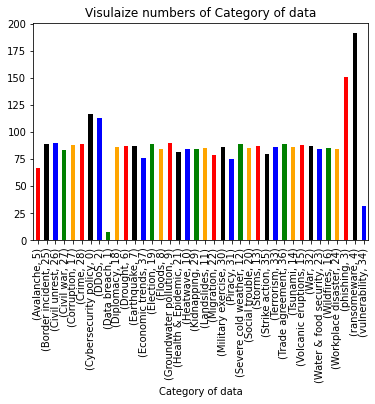

In [ ]:
data.groupby("Search Query").CategoryId.value_counts().plot(kind = "bar", color = ["red", "black", "blue", "green", "orange"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

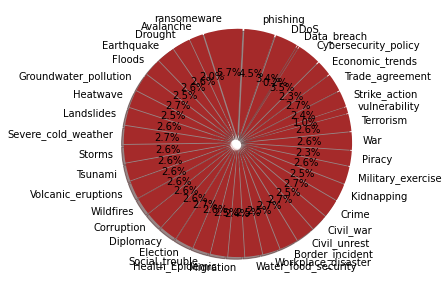

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["brown"]
Cybersecurity_policy = data[data['CategoryId'] == 0 ]
Data_breach	 = data[data['CategoryId'] == 1 ]
DDoS = data[data['CategoryId'] == 2]
phishing = data[data['CategoryId'] == 3]
ransomeware = data[data['CategoryId'] == 4]
Avalanche = data[data['CategoryId'] == 5]
Drought = data[data['CategoryId'] == 6]
Earthquake = data[data['CategoryId'] == 7]
Floods = data[data['CategoryId'] == 8]
Groundwater_pollution = data[data['CategoryId'] == 9]
Heatwave = data[data['CategoryId'] == 10]
Landslides = data[data['CategoryId'] == 11]
Severe_cold_weather = data[data['CategoryId'] == 12]
Storms = data[data['CategoryId'] == 13]
Tsunami = data[data['CategoryId'] == 14]
Volcanic_eruptions = data[data['CategoryId'] == 15]
Wildfires = data[data['CategoryId'] == 16]
Corruption = data[data['CategoryId'] == 17]
Diplomacy = data[data['CategoryId'] == 18]
Election = data[data['CategoryId'] == 19]
Social_trouble = data[data['CategoryId'] == 20]
Health_Epidemic = data[data['CategoryId'] == 21]
Migration = data[data['CategoryId'] == 22]
Water_food_security = data[data['CategoryId'] == 23]
Workplace_disaster = data[data['CategoryId'] == 24]
Border_incident = data[data['CategoryId'] == 25]
Civil_unrest = data[data['CategoryId'] == 26]
Civil_war = data[data['CategoryId'] == 27]
Crime = data[data['CategoryId'] == 28]
Kidnapping = data[data['CategoryId'] == 29]
Military_exercise = data[data['CategoryId'] == 30]
Piracy = data[data['CategoryId'] == 31]
War = data[data['CategoryId'] == 32]
Terrorism = data[data['CategoryId'] == 33]
vulnerability = data[data['CategoryId'] == 34]
Strike_action = data[data['CategoryId'] == 35]
Trade_agreement = data[data['CategoryId'] == 36]
Economic_trends = data[data['CategoryId'] == 37]

count = [Cybersecurity_policy['CategoryId'].count(), Data_breach['CategoryId'].count(), DDoS['CategoryId'].count(), phishing['CategoryId'].count(), ransomeware['CategoryId'].count(), Avalanche['CategoryId'].count(), Drought['CategoryId'].count(), Earthquake['CategoryId'].count(), Floods['CategoryId'].count(), Groundwater_pollution['CategoryId'].count(), Heatwave['CategoryId'].count(), Landslides['CategoryId'].count(), Severe_cold_weather['CategoryId'].count(), Storms['CategoryId'].count(), Tsunami['CategoryId'].count(), Volcanic_eruptions['CategoryId'].count(), Wildfires['CategoryId'].count(), Corruption['CategoryId'].count(), Diplomacy['CategoryId'].count(), Election['CategoryId'].count(), Social_trouble['CategoryId'].count(), Health_Epidemic['CategoryId'].count(), Migration['CategoryId'].count(), Water_food_security['CategoryId'].count(), Workplace_disaster['CategoryId'].count(), Border_incident['CategoryId'].count(), Civil_unrest['CategoryId'].count(), Civil_war['CategoryId'].count(), Crime['CategoryId'].count(), Kidnapping['CategoryId'].count(), Military_exercise['CategoryId'].count(), Piracy['CategoryId'].count(), War['CategoryId'].count(), Terrorism['CategoryId'].count(), vulnerability['CategoryId'].count(), Strike_action['CategoryId'].count(), Trade_agreement['CategoryId'].count(), Economic_trends['CategoryId'].count()]
pie = plt.pie(count, labels = ['Cybersecurity_policy', 'Data_breach', 'DDoS', 'phishing', 'ransomeware', 'Avalanche', 'Drought', 'Earthquake', 'Floods', 'Groundwater_pollution', 'Heatwave', 'Landslides', 'Severe_cold_weather', 'Storms', 'Tsunami', 'Volcanic_eruptions', 'Wildfires', 'Corruption', 'Diplomacy', 'Election', 'Social_trouble', 'Health_Epidemic', 'Migration', 'Water_food_security', 'Workplace_disaster', 'Border_incident', 'Civil_unrest', 'Civil_war', 'Crime', 'Kidnapping', 'Military_exercise', 'Piracy', 'War', 'Terrorism', 'vulnerability', 'Strike_action', 'Trade_agreement', 'Economic_trends'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))

In [ ]:
from wordcloud import WordCloud

Cybersecurity_policy related words:


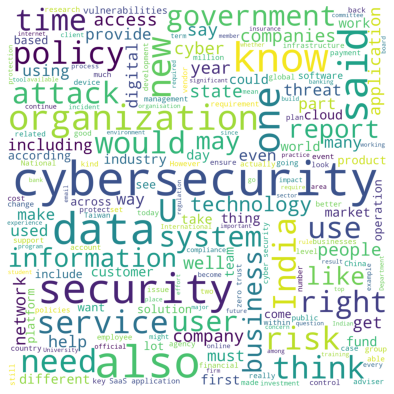

Data_breach related words:


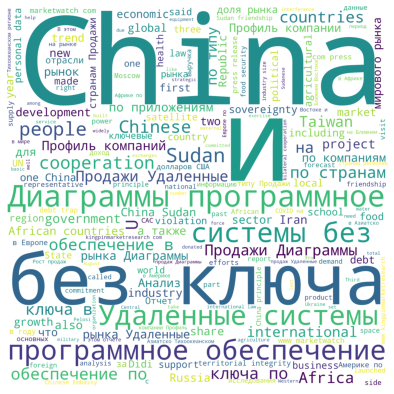

DDoS related words:


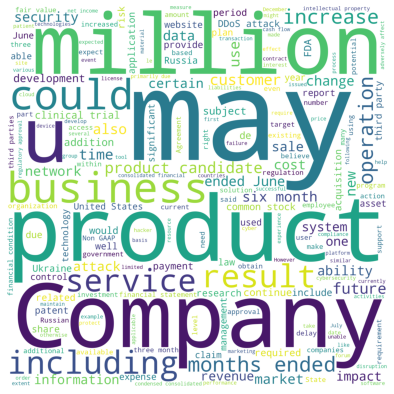

phishing related words:


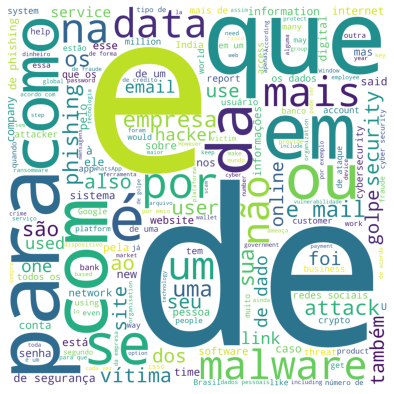

ransomeware related words:


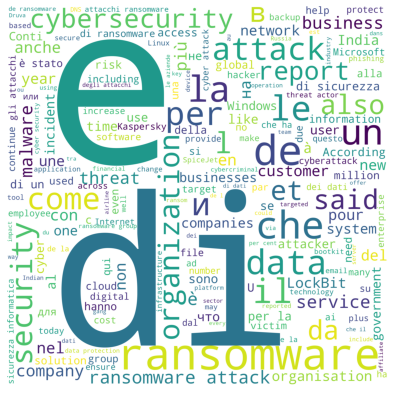

Avalanche related words:


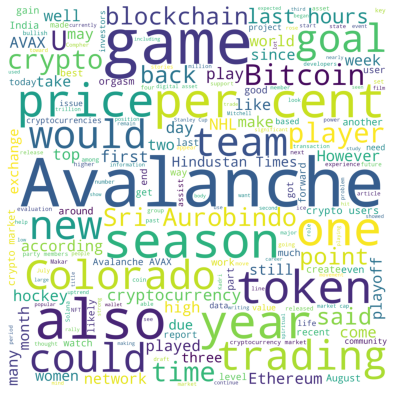

Drought related words:


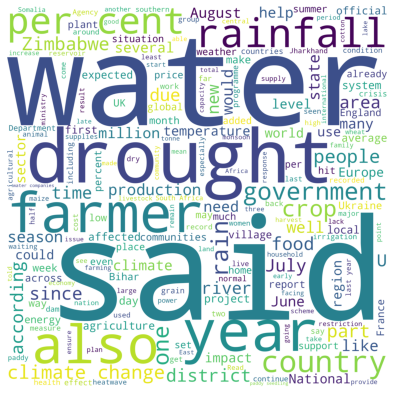

Earthquake related words:


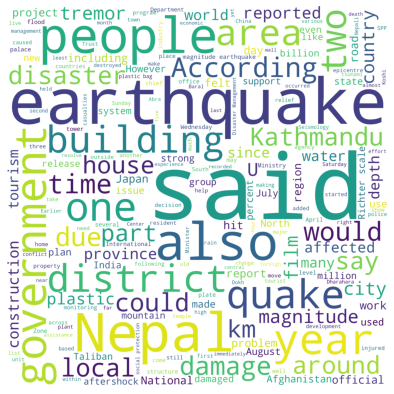

Floods related words:


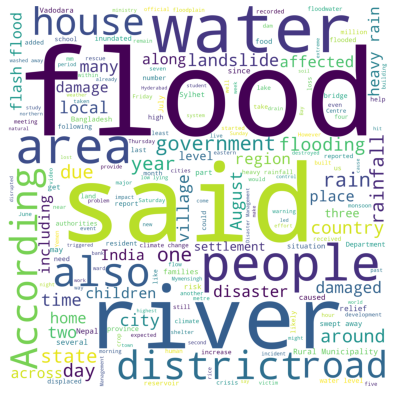

Groundwater_pollution related words:


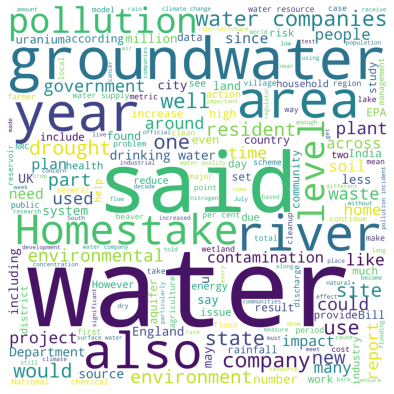

Heatwave related words:


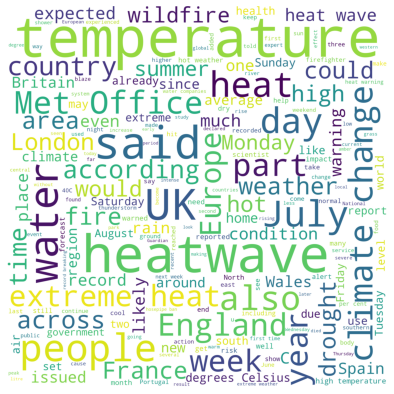

Landslides related words:


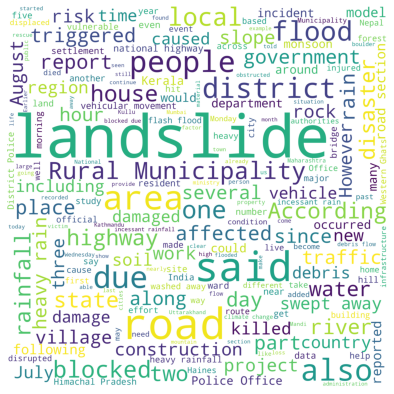

Severe_cold_weather related words:


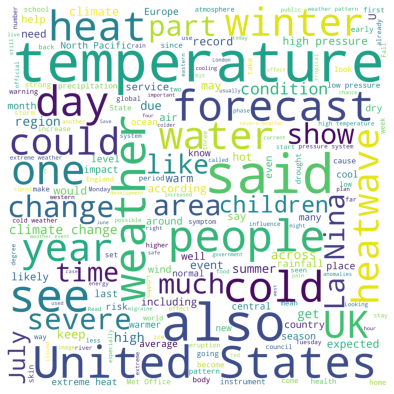

Storms related words:


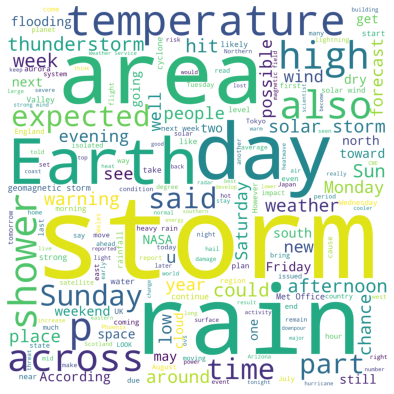

Tsunami related words:


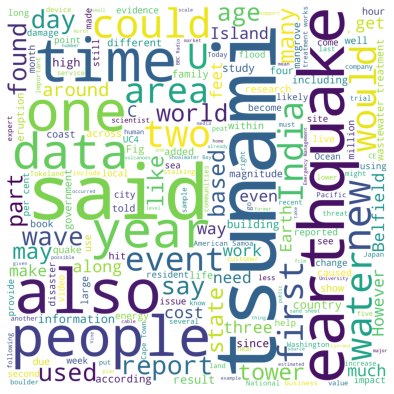

Volcanic_eruptions related words:


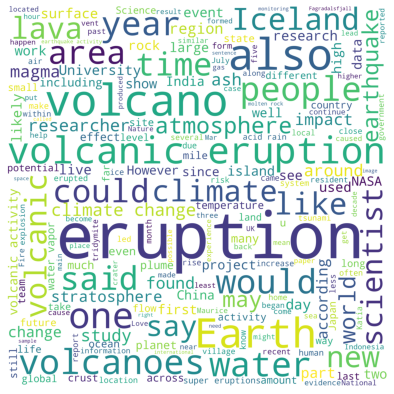

Wildfires related words:


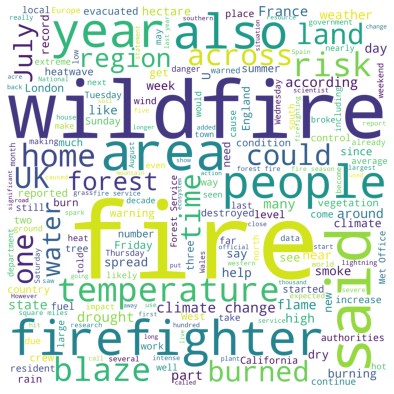

Corruption related words:


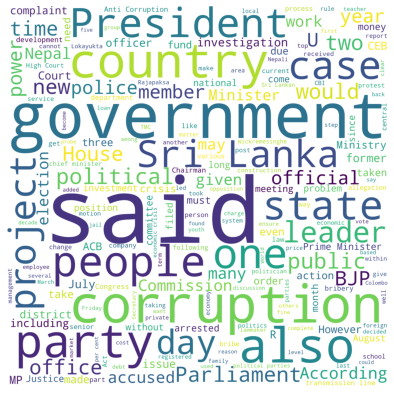

Diplomacy related words:


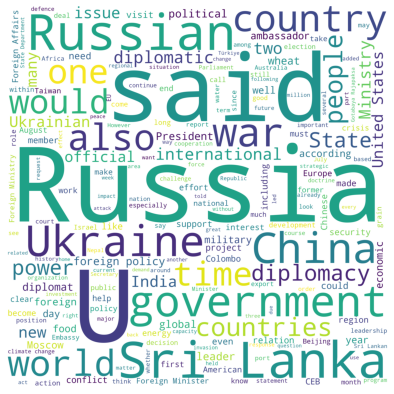

Election related words:


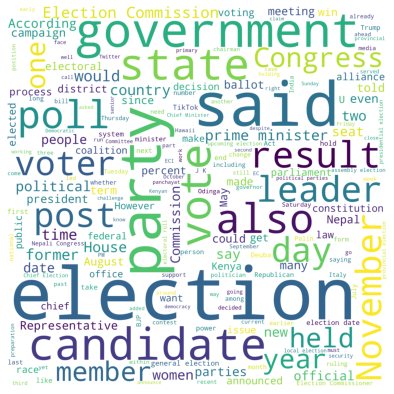

Social_trouble related words:


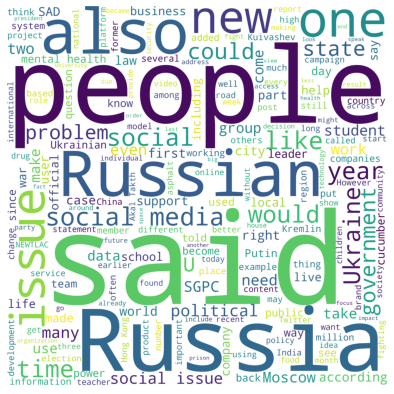

Health_Epidemic related words:


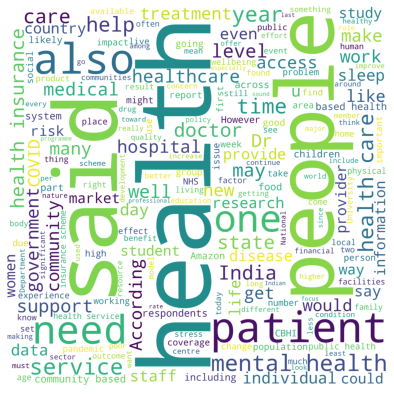

Migration related words:


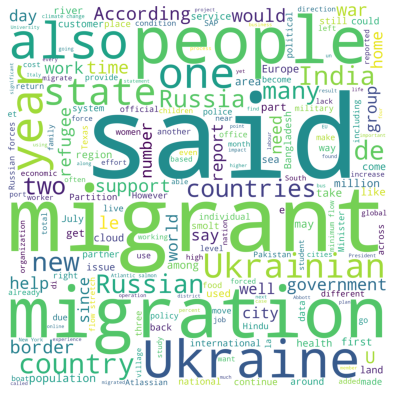

Water_food_security related words:


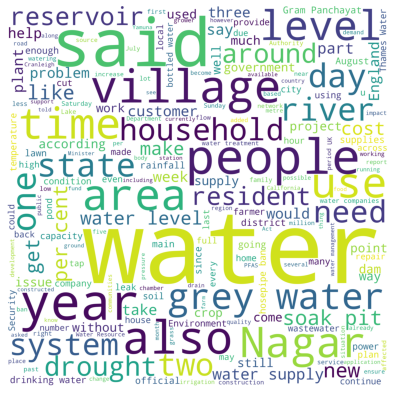

Workplace_disaster related words:


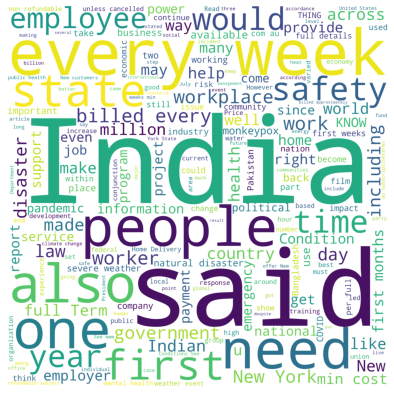

Border_incident related words:


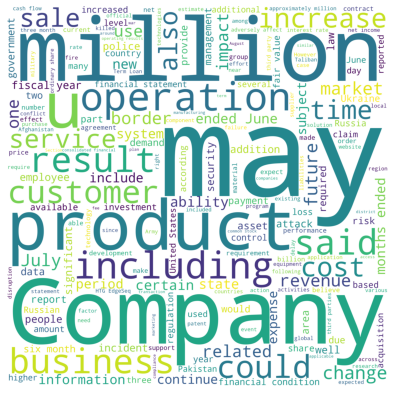

Civil_unrest related words:


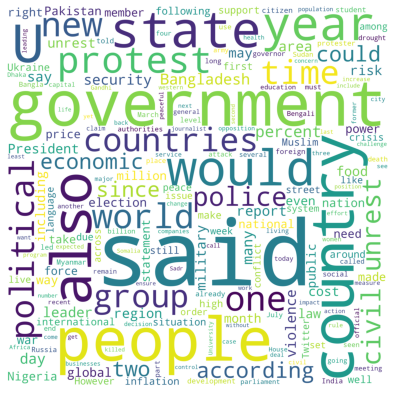

Civil_war related words:


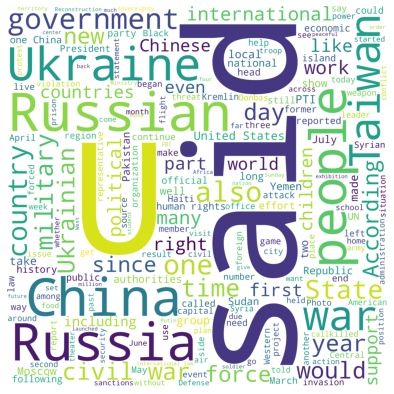

Crime related words:


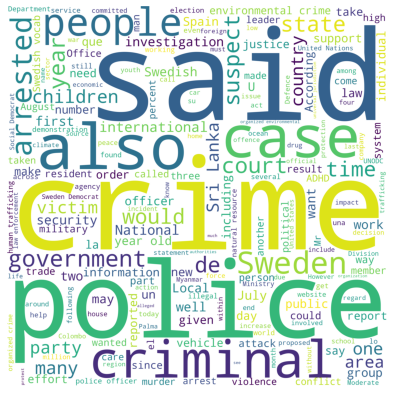

Kidnapping related words:


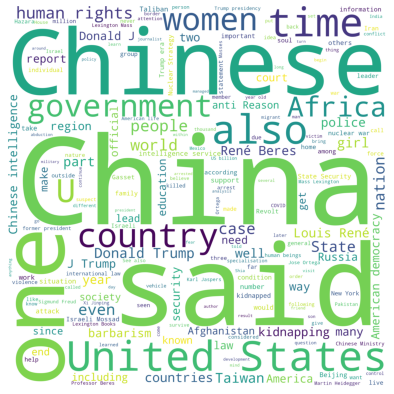

Military_exercise related words:


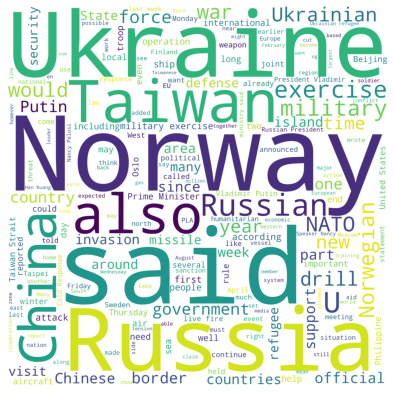

Piracy related words:


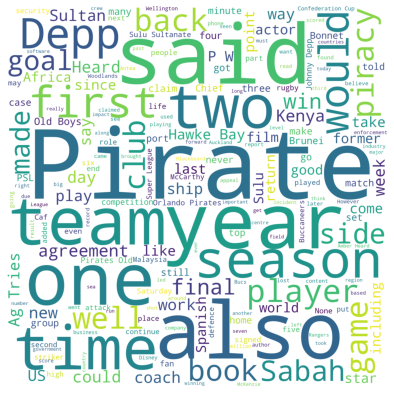

War related words:


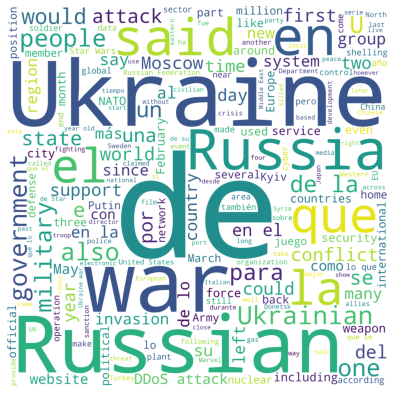

Terrorism related words:


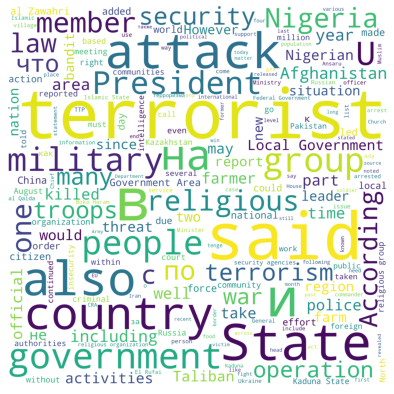

vulnerability related words:


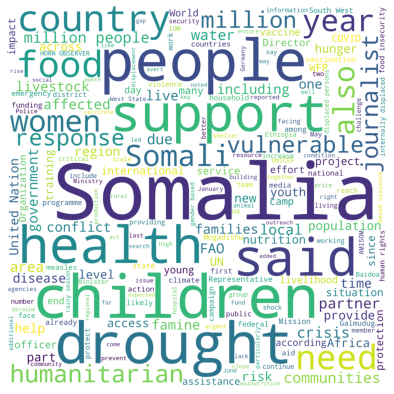

Strike_action related words:


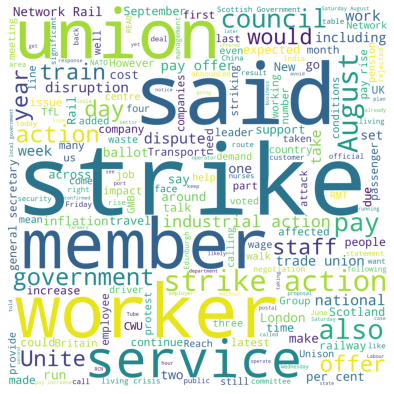

Trade_agreement related words:


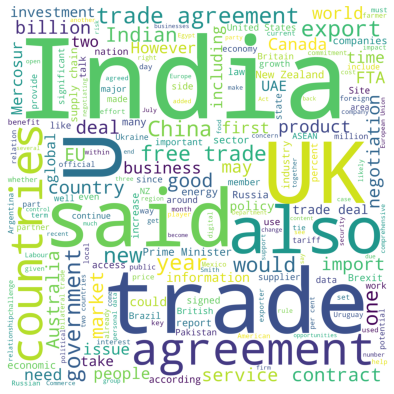

Economic_trends related words:


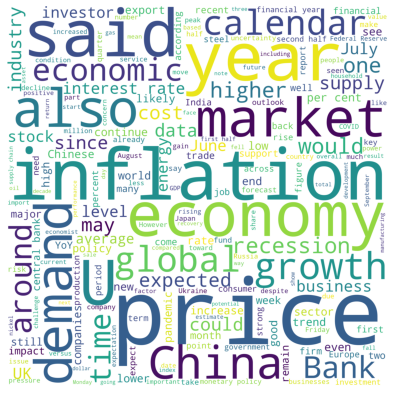

In [ ]:
stop = set(stopwords.words('english'))

Cybersecurity_policy = data[data['CategoryId'] == 0]
Cybersecurity_policy = Cybersecurity_policy['Text']

Data_breach = data[data['CategoryId'] == 1]
Data_breach = Data_breach['Text']

DDoS = data[data['CategoryId'] == 2]
DDoS = DDoS['Text']

phishing = data[data['CategoryId'] == 3]
phishing = phishing['Text']

ransomeware = data[data['CategoryId'] == 4]
ransomeware = ransomeware['Text']

Avalanche = data[data['CategoryId'] == 5]
Avalanche = Avalanche['Text']

Drought = data[data['CategoryId'] == 6]
Drought = Drought['Text']

Earthquake = data[data['CategoryId'] == 7]
Earthquake = Earthquake['Text']

Floods = data[data['CategoryId'] == 8]
Floods = Floods['Text']

Groundwater_pollution = data[data['CategoryId'] == 9]
Groundwater_pollution = Groundwater_pollution['Text']

Heatwave = data[data['CategoryId'] == 10]
Heatwave = Heatwave['Text']

Landslides = data[data['CategoryId'] == 11]
Landslides = Landslides['Text']

Severe_cold_weather = data[data['CategoryId'] == 12]
Severe_cold_weather = Severe_cold_weather['Text']

Storms = data[data['CategoryId'] == 13]
Storms = Storms['Text']

Tsunami = data[data['CategoryId'] == 14]
Tsunami = Tsunami['Text']

Volcanic_eruptions = data[data['CategoryId'] == 15]
Volcanic_eruptions = Volcanic_eruptions['Text']

Wildfires = data[data['CategoryId'] == 16]
Wildfires = Wildfires['Text']

Corruption = data[data['CategoryId'] == 17]
Corruption = Corruption['Text']

Diplomacy = data[data['CategoryId'] == 18]
Diplomacy = Diplomacy['Text']

Election = data[data['CategoryId'] == 19]
Election = Election['Text']

Social_trouble = data[data['CategoryId'] == 20]
Social_trouble = Social_trouble['Text']

Health_Epidemic = data[data['CategoryId'] == 21]
Health_Epidemic = Health_Epidemic['Text']

Migration = data[data['CategoryId'] == 22]
Migration = Migration['Text']

Water_food_security = data[data['CategoryId'] == 23]
Water_food_security = Water_food_security['Text']

Workplace_disaster = data[data['CategoryId'] == 24]
Workplace_disaster = Workplace_disaster['Text']

Border_incident = data[data['CategoryId'] == 25]
Border_incident = Border_incident['Text']

Civil_unrest = data[data['CategoryId'] == 26]
Civil_unrest = Civil_unrest['Text']

Civil_war = data[data['CategoryId'] == 27]
Civil_war = Civil_war['Text']

Crime = data[data['CategoryId'] == 28]
Crime = Crime['Text']

Kidnapping = data[data['CategoryId'] == 29]
Kidnapping = Kidnapping['Text']

Military_exercise = data[data['CategoryId'] == 30]
Military_exercise = Military_exercise['Text']

Piracy = data[data['CategoryId'] == 31]
Piracy = Piracy['Text']

War = data[data['CategoryId'] == 32]
War = War['Text']

Terrorism = data[data['CategoryId'] == 33]
Terrorism = Terrorism['Text']

vulnerability = data[data['CategoryId'] == 34]
vulnerability = vulnerability['Text']

Strike_action = data[data['CategoryId'] == 35]
Strike_action = Strike_action['Text']

Trade_agreement = data[data['CategoryId'] == 36]
Trade_agreement = Trade_agreement['Text']

Economic_trends = data[data['CategoryId'] == 37]
Economic_trends = Economic_trends['Text']

def wordcloud_draw(data, color = 'white'):
  words = ' '.join(data)
  cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
  background_color = color, width = 2500, height = 2500).generate(cleaned_word)
  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("Cybersecurity_policy related words:")
wordcloud_draw(Cybersecurity_policy, 'white')

print("Data_breach related words:")
wordcloud_draw(Data_breach, 'white')

print("DDoS related words:")
wordcloud_draw(DDoS, 'white')

print("phishing related words:")
wordcloud_draw(phishing, 'white')

print("ransomeware related words:")
wordcloud_draw(ransomeware, 'white')

print("Avalanche related words:")
wordcloud_draw(Avalanche, 'white')

print("Drought related words:")
wordcloud_draw(Drought, 'white')

print("Earthquake related words:")
wordcloud_draw(Earthquake, 'white')

print("Floods related words:")
wordcloud_draw(Floods, 'white')

print("Groundwater_pollution related words:")
wordcloud_draw(Groundwater_pollution, 'white')

print("Heatwave related words:")
wordcloud_draw(Heatwave, 'white')

print("Landslides related words:")
wordcloud_draw(Landslides, 'white')

print("Severe_cold_weather related words:")
wordcloud_draw(Severe_cold_weather, 'white')

print("Storms related words:")
wordcloud_draw(Storms, 'white')

print("Tsunami related words:")
wordcloud_draw(Tsunami, 'white')

print("Volcanic_eruptions related words:")
wordcloud_draw(Volcanic_eruptions, 'white')

print("Wildfires related words:")
wordcloud_draw(Wildfires, 'white')

print("Corruption related words:")
wordcloud_draw(Corruption, 'white')

print("Diplomacy related words:")
wordcloud_draw(Diplomacy, 'white')

print("Election related words:")
wordcloud_draw(Election, 'white')

print("Social_trouble related words:")
wordcloud_draw(Social_trouble, 'white')

print("Health_Epidemic related words:")
wordcloud_draw(Health_Epidemic, 'white')

print("Migration related words:")
wordcloud_draw(Migration, 'white')

print("Water_food_security related words:")
wordcloud_draw(Water_food_security, 'white')

print("Workplace_disaster related words:")
wordcloud_draw(Workplace_disaster, 'white')

print("Border_incident related words:")
wordcloud_draw(Border_incident, 'white')

print("Civil_unrest related words:")
wordcloud_draw(Civil_unrest, 'white')

print("Civil_war related words:")
wordcloud_draw(Civil_war, 'white')

print("Crime related words:")
wordcloud_draw(Crime, 'white')

print("Kidnapping related words:")
wordcloud_draw(Kidnapping, 'white')

print("Military_exercise related words:")
wordcloud_draw(Military_exercise, 'white')

print("Piracy related words:")
wordcloud_draw(Piracy, 'white')

print("War related words:")
wordcloud_draw(War, 'white')

print("Terrorism related words:")
wordcloud_draw(Terrorism, 'white')

print("vulnerability related words:")
wordcloud_draw(vulnerability, 'white')

print("Strike_action related words:")
wordcloud_draw(Strike_action, 'white')

print("Trade_agreement related words:")
wordcloud_draw(Trade_agreement, 'white')

print("Economic_trends related words:")
wordcloud_draw(Economic_trends, 'white')


In [ ]:
text = data["Text"]
text.head(10)

0          Wipro Limited, leading technology servic...
1    Security threats on the internet have always b...
2    Ranchi (Jharkhand) [India] August 13 (ANI/News...
3    US congressmen to visit Taipei from August 14-...
4    NEW DELHI: Last month, a small cybersecurity f...
5    Cases related to online frauds have come down ...
6    In a world where everything is on the Internet...
7    New Delhi, Aug 15: The strongest IPS officer i...
8    Why is Cyber Insurance a must-have in today’s ...
9    With cyber threats continuing to grow both in ...
Name: Text, dtype: object

In [ ]:
category = data["Search Query"]
category.head(10)

0    Cybersecurity policy
1    Cybersecurity policy
2    Cybersecurity policy
3    Cybersecurity policy
4    Cybersecurity policy
5    Cybersecurity policy
6    Cybersecurity policy
7    Cybersecurity policy
8    Cybersecurity policy
9    Cybersecurity policy
Name: Search Query, dtype: object

In [ ]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
data['Text'] = data['Text'].apply(remove_tags)

In [ ]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
data['Text'] = data['Text'].apply(special_char)

In [ ]:
def convert_lower(text):
   return text.lower()
data['Text'] = data['Text'].apply(convert_lower)
data['Text'][1]

'security threats on the internet have always been a major concern  but over the years  it s the cracked versions of banned apps working from under the seams  that are giving the governments a hard time   india has a host of applications available in the market  for anything that you can think of  there s an app to the rescue  right from booking a cab to ordering your favourite food  apps are used for chores all through the day  this popularity and dependency of apps has given birth to another format of applications   the apk   famously known as the android package  apk   it is a file format used by the android operating system that enables users to install apps  it mainly contains files such as manifest  layout files  and classes dex  etc  which can easily be generated from apk andriod bundles   another version of mod apk allows users to unlock inaccessible features  i e  countering subscription plans or the latest app version  users recommend downloading mod from a  trusted source  s

In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
data['Text'] = data['Text'].apply(remove_stopwords)
data['Text'][1]


['security',
 'threats',
 'internet',
 'always',
 'major',
 'concern',
 'years',
 'cracked',
 'versions',
 'banned',
 'apps',
 'working',
 'seams',
 'giving',
 'governments',
 'hard',
 'time',
 'india',
 'host',
 'applications',
 'available',
 'market',
 'anything',
 'think',
 'app',
 'rescue',
 'right',
 'booking',
 'cab',
 'ordering',
 'favourite',
 'food',
 'apps',
 'used',
 'chores',
 'day',
 'popularity',
 'dependency',
 'apps',
 'given',
 'birth',
 'another',
 'format',
 'applications',
 'apk',
 'famously',
 'known',
 'android',
 'package',
 'apk',
 'file',
 'format',
 'used',
 'android',
 'operating',
 'system',
 'enables',
 'users',
 'install',
 'apps',
 'mainly',
 'contains',
 'files',
 'manifest',
 'layout',
 'files',
 'classes',
 'dex',
 'etc',
 'easily',
 'generated',
 'apk',
 'andriod',
 'bundles',
 'another',
 'version',
 'mod',
 'apk',
 'allows',
 'users',
 'unlock',
 'inaccessible',
 'features',
 'e',
 'countering',
 'subscription',
 'plans',
 'latest',
 'app',
 'versio

In [ ]:
import nltk
nltk.download('omw-1.4')
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
data['Text'] = data['Text'].apply(lemmatize_word)
data['Text'][1]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'security threat internet always major concern year cracked version banned apps working seam giving government hard time india host application available market anything think app rescue right booking cab ordering favourite food apps used chore day popularity dependency apps given birth another format application apk famously known android package apk file format used android operating system enables user install apps mainly contains file manifest layout file class dex etc easily generated apk andriod bundle another version mod apk allows user unlock inaccessible feature e countering subscription plan latest app version user recommend downloading mod trusted source since unknown source invite malware dangerous code leading vulnerability bypass authentication data open recent study appknox say 75 india top 100 android apps contain security risk even prominent one lagging basic security check moreover google provides application programming interface apis enable authenticated third party

In [ ]:
data

Title  \
0     Wipro launches Wipro Shelde Australia to bolst...   
1                        Are Banned Apps Really Banned?   
2     Governor of Jharkhand launches Ranchi Universi...   
3      US congressmen to visit Taipei from August 14-15   
4     Security firm finds flaws in Indian online ins...   
...                                                 ...   
3317  Klaipeda looks to position itself as the Blue ...   
3318  GBP/CA$ Outlook: Pound Canadian Dollar Rate Tr...   
3319  IN BRIEF: Thalassa turns to interim profit but...   
3320  Collapse in Empire State Index: &quot;Startlin...   
3321  Just when you thought things couldn’t get wors...   

                                              News Link       Published Date  \
0     https://www.livemint.com/companies/news/wipro-...  08/11/2022 09:37:45   
1     https://analyticsindiamag.com/are-banned-apps-...  08/15/2022 04:30:00   
2     https://theprint.in/ani-press-releases/governo...  08/13/2022 11:52:13   
3     http://www.uniindia.com/us-congressmen-to-visi...  08/14/2022 23:05:57   
4     https://www.newindianexpress.com/business/2022...  08/10/2022 17:09:00   
...                                                 ...                  ...   
3317  https://allaboutshipping.co.uk/2022/08/15/klai...  08/15/2022 07:36:14   
3318  https://www.exchangerates.org.uk/news/36283/20...  08/09/2022 10:00:00   
3319  https://www.sharesmagazine.co.uk/news/market/1...  08/15/2022 10:49:50   
3320  https://www.poundsterlinglive.com/economics/17...  08/15/2022 20:37:12   
3321  https://think.ing.com/articles/just-when-you-t...  08/15/2022 00:00:00   

                                                   Text  \
0     wipro limited leading technology service consu...   
1     security threat internet always major concern ...   
2     ranchi jharkhand india august 13 ani newsvoir ...   
3     u congressman visit taipei august 14 15 washin...   
4     new delhi last month small cybersecurity firm ...   
...                                                 ...   
3317  dynamic lithuanian port city gear showcase off...   
3318  pound canadian dollar gbp cad exchange rate tr...   
3319  thalassa holding ltd british virgin island bas...   
3320  measure u manufacturing health recorded second...   
3321  many part europe germany hit long unprecedente...   

                    Authors  \
0                  Livemint   
1            Bhuvana Kamath   
2                    ANI PR   
3     Uniindia News Service   
4          Associated Press   
...                     ...   
3317                  admin   
3318           Adam Solomon   
3319                    NaN   
3320             Gary Howes   
3321        Carsten Brzeski   

                                              Thumbnail  \
0     data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
1     data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
2     data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
3                                                   NaN   
4     data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
...                                                 ...   
3317  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
3318  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
3319                                                NaN   
3320  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   
3321  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...   

                        Source  \
0                         Mint   
1     Analytics India Magazine   
2                     ThePrint   
3         UNITED NEWS OF INDIA   
4       The New Indian Express   
...                        ...   
3317      All About Shipping -   
3318         Exchange Rates UK   
3319           Shares Magazine   
3320       Pound Sterling LIVE   
3321                 ING Think   

                                               Keywords  \
0     ['Wipro Shelde Australia', 'specialist Austral...   
1     ['India', 'apps', 'banned apps working', 'bann...   
2  

In [ ]:
x = data["Text"]
y = data["CategoryId"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(data.iloc[:,0].values)
y = np.array(data.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(data.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (3322, 5000)
y.shape =  (3322,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))


2325
997


In [ ]:
#create list of model and accuracy dicts
perform_list = [ ]

In [ ]:
def run_model(model_name, est_c, est_pnlty):
  mdl=""
  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()
  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(x_train, y_train)
  y_pred = oneVsRest.predict(x_test)

  # Performance metrics
  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

  # Get precision, recall, f1 scores
  precision, recall, f1score, support = score(y_test, y_pred, average='micro')

  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

  print(f'Precision : {precision}')

  print(f'Recall : {recall}')

  print(f'F1-score : {f1score}')

  # Add performance parameters to list
  perform_list.append(dict([

  ('Model', model_name),

  ('Test Accuracy', round(accuracy, 2)),

  ('Precision', round(precision, 2)),

  ('Recall', round(recall, 2)),

  ('F1', round(f1score, 2))

  ]))

In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Test Accuracy Score of Basic Logistic Regression: % 70.01
Precision : 0.7001003009027081
Recall : 0.7001003009027081
F1-score : 0.7001003009027081


In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 72.62
Precision : 0.7261785356068204
Recall : 0.7261785356068204
F1-score : 0.7261785356068203


In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 48.85
Precision : 0.4884653961885657
Recall : 0.4884653961885657
F1-score : 0.48846539618856577


In [ ]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 70.51
Precision : 0.7051153460381143
Recall : 0.7051153460381143
F1-score : 0.7051153460381143


In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 56.87
Precision : 0.5687061183550652
Recall : 0.5687061183550652
F1-score : 0.5687061183550652


In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

NameError: ignored

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 18.36
Precision : 0.18355065195586762
Recall : 0.18355065195586762
F1-score : 0.18355065195586764


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

Model  Test Accuracy  Precision  Recall    F1
0       Logistic Regression          70.01       0.70    0.70  0.70
1             Random Forest          72.62       0.73    0.73  0.73
2   Multinomial Naive Bayes          48.85       0.49    0.49  0.49
3  Support Vector Classifer          70.51       0.71    0.71  0.71
4  Decision Tree Classifier          56.87       0.57    0.57  0.57
5      Gaussian Naive Bayes          18.36       0.18    0.18  0.18

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 72.62 from Random


In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
y_pred1 = cv.transform(["The United States on Friday derisively called on Russian President Vladimir Putin to acknowledge reality and pull troops from Ukraine after he finally called the conflict a war.Since Putin ordered the invasion in February, Russia has officially spoken of a special military operation and imposed a law that criminalizes what authorities call misleading terminology."])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Cybersecurity Policy News"
elif yy == [1]:
  result = "Data Breach News"
elif yy == [2]:
  result = "DDoS News"
elif yy == [3]:
  result = "Phishing News"
elif yy == [4]:
  result = "Ransomeware News"
elif yy == [5]:
  result = "Avalanche News"
elif yy == [6]:
  result = "Drought News"
elif yy == [7]:
  result = "Earthquake News"
elif yy == [8]:
  result = "Floods News"
elif yy == [9]:
  result = "Groundwater Pollution News"
elif yy == [10]:
  result = "Heatwave News"
elif yy == [11]:
  result = "Landslides News"
elif yy == [12]:
  result = "Severe Cold Weather News"
elif yy == [13]:
  result = "Storms News"
elif yy == [14]:
  result = "Tsunami News"
elif yy == [15]:
  result = "Volcanic Eruptions News"
elif yy == [16]:
  result = "Wildfires News"
elif yy == [17]:
  result = "Corruption News"
elif yy == [18]:
  result = "Diplomacy News"
elif yy == [19]:
  result = "Election News"
elif yy == [20]:
  result = "Social Trouble News"
elif yy == [21]:
  result = "Health & Epidemic News"
elif yy == [22]:
  result = "Migration News"
elif yy == [23]:
  result = "Water & Food Security News"
elif yy == [24]:
  result = "Workplace Disaster News"
elif yy == [25]:
  result = "Border Incident News"
elif yy == [26]:
  result = "Civil Unrest News"
elif yy == [27]:
  result = "Civil War News"
elif yy == [28]:
  result = "Crime News"
elif yy == [29]:
  result = "Kidnapping News"
elif yy == [30]:
  result = "Military Exercise News"
elif yy == [31]:
  result = "Piracy News"
elif yy == [32]:
  result = "War News"
elif yy == [33]:
  result = "Terrorism News"
elif yy == [34]:
  result = "Vulnerability News"
elif yy == [35]:
  result = "Strike Action News"
elif yy == [36]:
  result = "Trade Agreement News"
elif yy == [37]:
  result = "Economic Trends News"

print(result)

War News
